# Plot data

In [69]:
import os
from bin.equalise import equaliser
from Bio import SeqIO
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [70]:
def smooth(vector:list, window_size=10)->list:
    out_vector = []
    for index in range(len(vector)-window_size):
        out_vector.append(np.mean(vector[index:index+window_size]))
    return out_vector

In [7]:
freq_tables = "data/frequency_tables"
origin_organism = "hsapiens"
dest_organism = "ecoli"
sequences_path = "test/seq.fasta"

In [9]:
with open(os.path.join(freq_tables, f"{origin_organism}.json"), 'r') as fh:
       origin_dic = json.load(fh)
with open(os.path.join(freq_tables, f"{dest_organism}.json"), 'r') as fh:
    dest_dic = json.load(fh)
sequences = list(SeqIO.parse(sequences_path, "fasta"))

output_data = []
for sequence in sequences:
    out_ = equaliser(sequence, origin_dic, dest_dic)
    output_data.append(out_)

output_sequences = [i[0] for i in output_data]


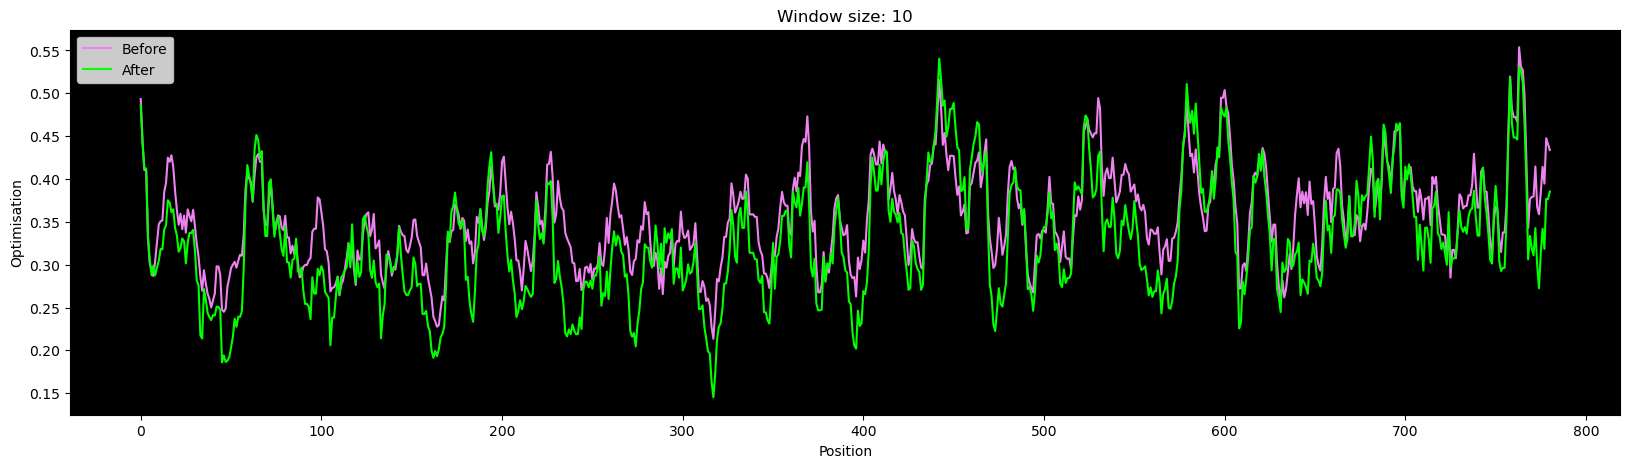

In [85]:
w_size = 10

fig, ax = plt.subplots(figsize=[20,5])
ax.set_facecolor("black")

plt.plot(smooth(output_data[0][1], w_size), alpha=1, color="violet", label="Before")
plt.plot(smooth(output_data[0][2], w_size), alpha=1, color="lime", label="After")

plt.legend()
plt.title(f"Window size: {w_size}")
plt.ylabel("Optimisation")
plt.xlabel("Position")
plt.show()

pearsonr = 0.87


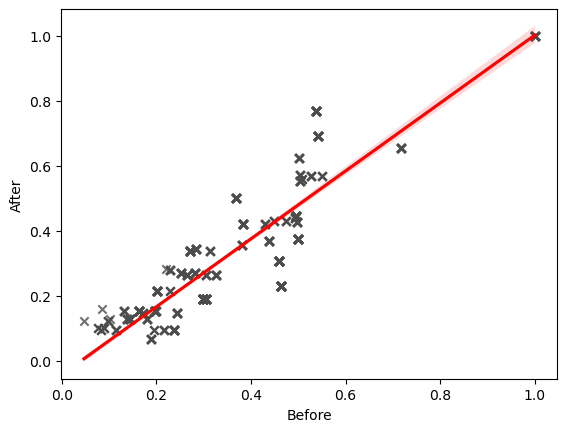

In [81]:
sns.regplot(x=output_data[0][1], y=output_data[0][2],  marker="x", color=".3", line_kws=dict(color="r"))

plt.xlabel("Before")
plt.ylabel("After")

corr = np.corrcoef(output_data[0][1], output_data[0][2])[0][1]
print(f"pearsonr = {round(corr, 2)}")